# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 8

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **4 мая в 23:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

In [77]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import math
import matplotlib.pyplot as plt
from statsmodels.sandbox.stats.multicomp import multipletests
import seaborn as sns
sns.set(font_scale=1.3)
%matplotlib inline

## Задача 1: Белые мыши наносят ответный удар (продолжение)

Скачаем [данные](https://www.kaggle.com/ruslankl/mice-protein-expression) об экспрессии генов различных белков в головном мозге белых мышей.

В этом датасете представлены уровни экспрессии 77 белков, измеренные в коре головного мозга 8 классов мышей, некоторые из которых страдают синдромом Дауна, а некоторые были подвержены контекстному обусловливанию страха, задачи, используемой для оценки ассоциативного обучения.

Данные содержат информацию о 38 контрольных мышей и 34 трисомных мышей (синдром Дауна), то есть всего 72 мышки. Проведено 15 измерений каждого белка для каждой мышки, то есть каждой мыши соответствует несколько записей в таблице.

Загрузим данные и посмотрим на начало таблицы. Всего мы имеем 82 колонки, в большинстве их которых содержатся вещественные данные (уровни экспрессии 77 белков). Остальные колонки содержат категориальные данные (с небольшим числом значений).

**Предварительный анализ**

Эта часть цже оценена в прошлом дз, просто скопируйте графики.

In [55]:
data = pd.read_csv("./Data_Cortex_Nuclear.csv")
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


Чтобы вспомнить, что это за данные, для начала выведем простые описательные статистики по вещественным параметрам.

In [56]:
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


Количество записей каждого класса:

In [57]:
data['class'].value_counts()

c-CS-m    150
c-SC-m    150
t-SC-s    135
c-CS-s    135
t-SC-m    135
c-SC-s    135
t-CS-m    135
t-CS-s    105
Name: class, dtype: int64

Количество записей по генотипам:

In [58]:
data.Genotype.value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

В начале исследования полезно посмотреть на данные визуально. Посмотрим на зависимость уровней экспрессии разных белков друг от друга. Визуализируйте данные в первых десяти колонках в двумерных проекциях, используя `sns.pairplot`. 

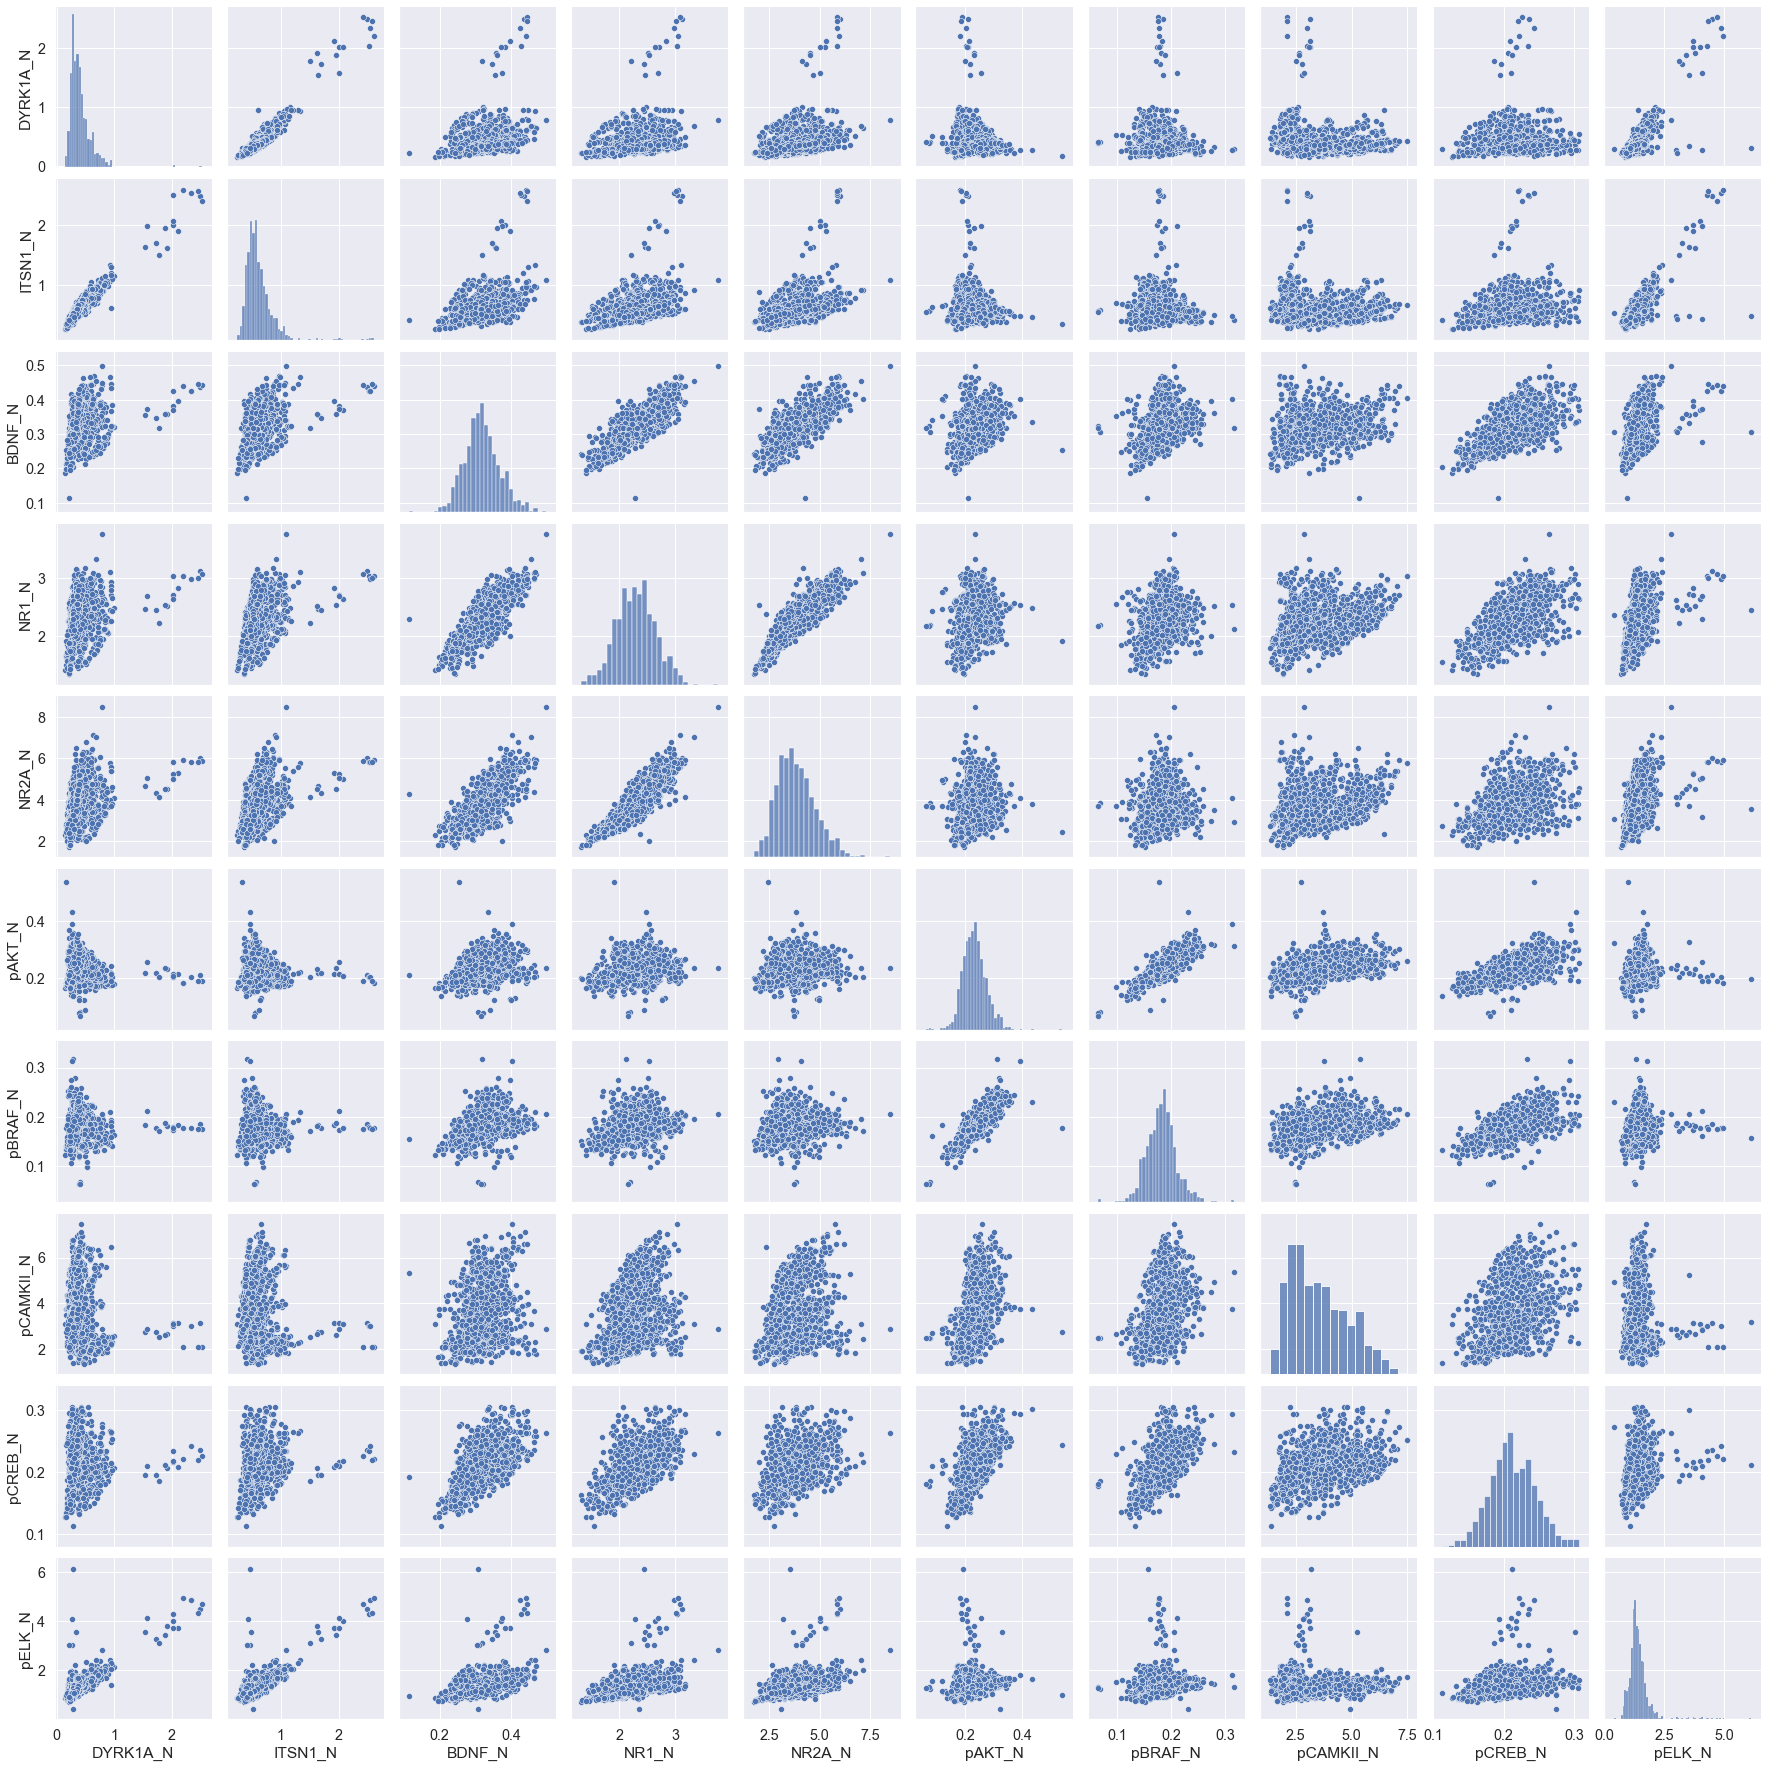

In [7]:
columns = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N']
data_columns = data[columns]
sns.pairplot(data_columns)

При визуализации в двумерных проекциях можно также строить ядерные оценки плотности:

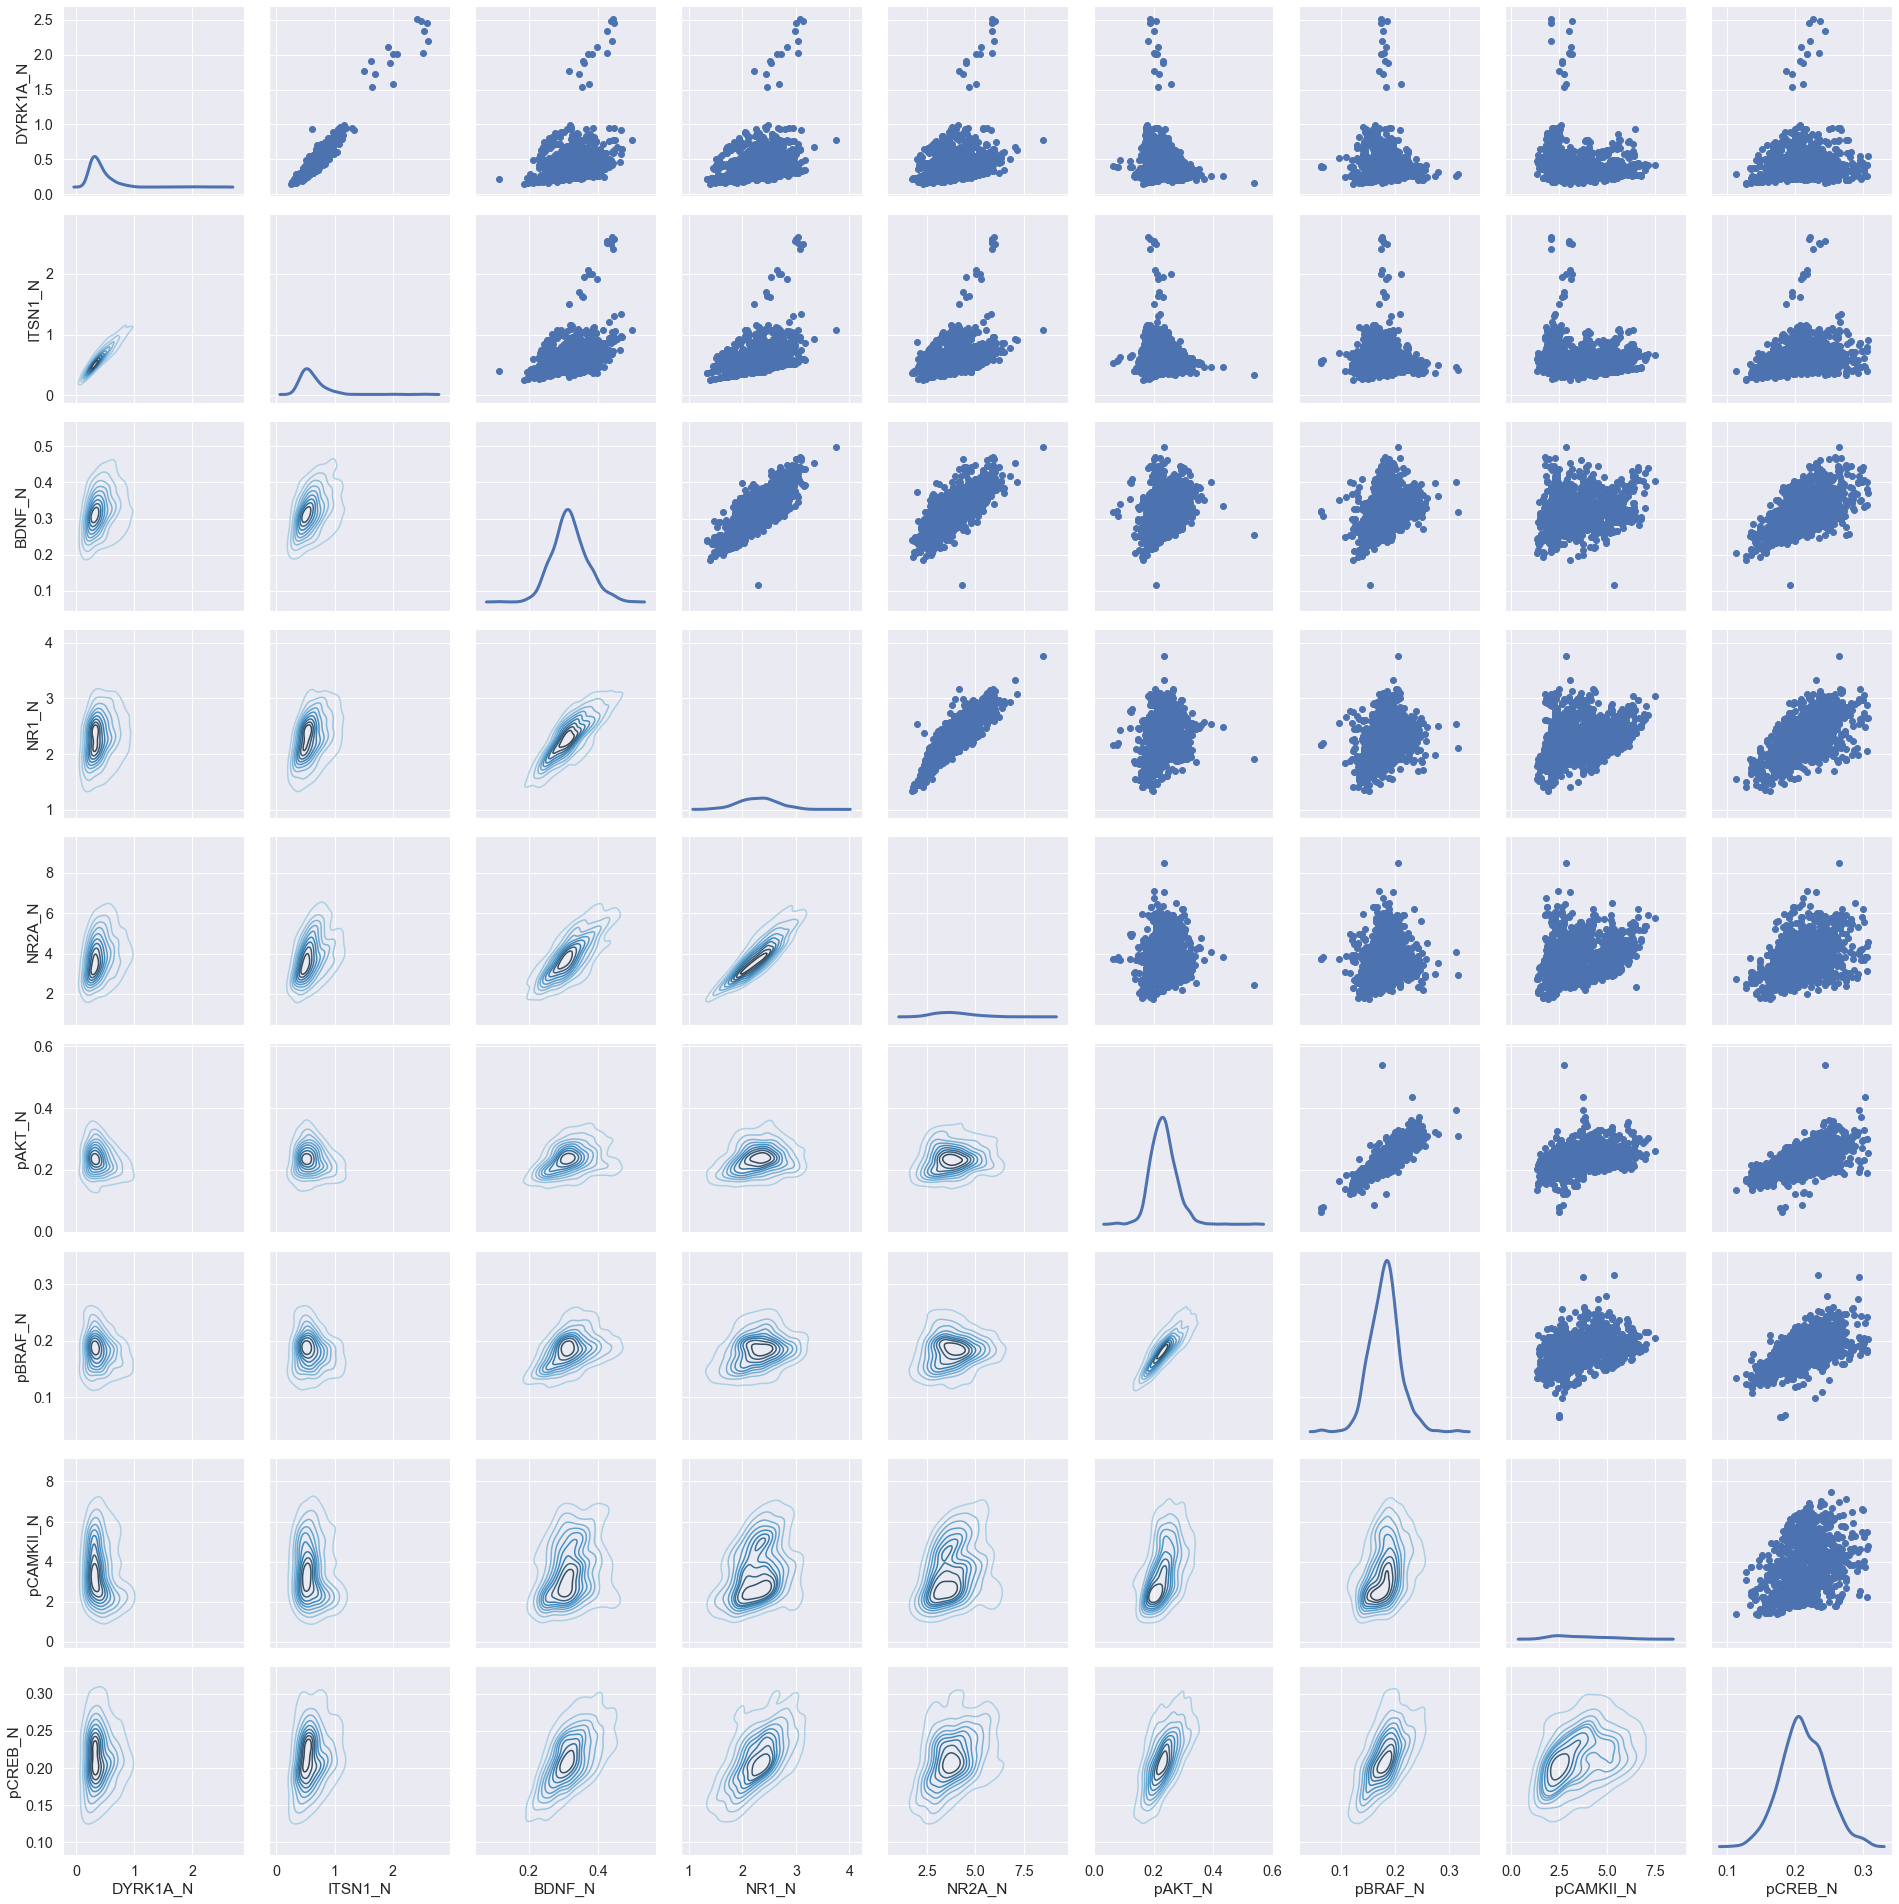

In [19]:
g = sns.PairGrid(data.iloc[:, 1:10].dropna(), height=3)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Визуализируйте двумерные проекции данных и ядерные оценки плотности с использованием `sns.PairGrid` отдельно по генотипам для 10 признаков. Используйте `hue='Genotype'` при вызове `sns.PairGrid`. По параметру `hue`  происходит разделение датасета.

#### 2. Дисперсионный анализ

##### 2.1. Зависимость распределения DYRK1A_N от генотипа

Проверьте гипотезу о равенстве распределений с использованием критерия Уилкоксона-Манна-Уитни с использованием различных альтернатив.  В реальных исследованиях нужно использовать конкретную альтернативу. 

Сделайте выводы. Также поясните, почему в данной задаче можно использовать этот критерий.

In [59]:
alternatives = ['two-sided', 'less', 'greater']
for a in alternatives:
    print(sps.mannwhitneyu(data[data['Genotype'] == 'Control']['DYRK1A_N'],
                data[data['Genotype'] == 'Ts65Dn']['DYRK1A_N'], use_continuity=True, alternative=a))

MannwhitneyuResult(statistic=101725.0, pvalue=1.5303452997371036e-17)
MannwhitneyuResult(statistic=101725.0, pvalue=7.651726498685518e-18)
MannwhitneyuResult(statistic=101725.0, pvalue=1.0)


**Вывод**  Все условия использования критерия выполняются, а именно выборки достаточно большого размера (как минимум каждая из них больше 50, а значит критерий можно использовать) и являются независимыми. Критерий с достаточно большой точностью дает достоверный результат (очень маленькие значения p-value).

Посчитайте реализацию оценки сдвига, связанную со статистикой Манна-Уитни, см. лекцию 11.

In [60]:
Dyrka_Control = data[data['Genotype'] == 'Control']['DYRK1A_N'].dropna().to_numpy()
Dyrka_Ts65Dn = data[data['Genotype'] == 'Ts65Dn']['DYRK1A_N'].dropna().to_numpy()
W = np.array([[Dyrka_Ts65Dn[j] - Dyrka_Control[i]   
                 for i in np.arange(len(Dyrka_Control))] for j in np.arange(len(Dyrka_Ts65Dn))]).flatten()
np.median(W)

0.0678743825

Посчитайте реализацию доверительного интервала величины сдвига. 


In [61]:
n = len(Dyrka_Control)
m = len(Dyrka_Ts65Dn)
k = math.floor(n*m/2 - 1/2 -sps.norm.ppf(0.95)*np.sqrt(n*m*(n+m+1)/12))

print('Доверительный интервал: (',np.sort(W)[k+1],',',np.sort(W)[n*m-k], ')')

Доверительный интервал: ( 0.05490137500000003 , 0.08095821799999997 )


##### 2.2. Зависимость распределения  BDNF_N от генотипа


Проверьте гипотезу с использованием критерия Уилкоксона-Манна-Уитни при различных альтернативах, посчитайте оценку сдвига и доверительный интервал. Сделайте выводы. 

In [62]:
alternatives = ['two-sided', 'less', 'greater']
for a in alternatives:
    print(sps.mannwhitneyu(data[data['Genotype'] == 'Control']['BDNF_N'],
                data[data['Genotype'] == 'Ts65Dn']['BDNF_N'], use_continuity=True, alternative=a))

MannwhitneyuResult(statistic=152167.0, pvalue=0.18284761646679482)
MannwhitneyuResult(statistic=152167.0, pvalue=0.9086082927858418)
MannwhitneyuResult(statistic=152167.0, pvalue=0.09142380823339741)


In [63]:
Dyrka_Control = data[data['Genotype'] == 'Control']['BDNF_N'].dropna().to_numpy()
Dyrka_Ts65Dn = data[data['Genotype'] == 'Ts65Dn']['BDNF_N'].dropna().to_numpy()
W = np.array([[Dyrka_Ts65Dn[j] - Dyrka_Control[i]   
                 for i in np.arange(len(Dyrka_Control))] for j in np.arange(len(Dyrka_Ts65Dn))]).flatten()
np.median(W)

-0.004431168499999999

In [64]:
n = len(Dyrka_Control)
m = len(Dyrka_Ts65Dn)
k = math.floor(n*m/2 - 1/2 -sps.norm.ppf(0.95)*np.sqrt(n*m*(n+m+1)/12))

print('Доверительный интервал: (',np.sort(W)[k+1],',',np.sort(W)[n*m-k], ')')

Доверительный интервал: ( -0.009274271999999972 , 0.0004146499999999609 )


**Вывод** Имеется сдвиг, об этом говорит как и критерий Манна-Уитни, так и доверительный интервал, который содержит нашу оценку.

Как связаны доверительные интервалы с проверкой гипотез? Вам могут помочь прошлые лекции. Подтверждается ли это в данном примере?

Гипотеза будет отвергаться, если доверительный интервал уровня доверия 95% будет содержать нашу оценку.

Проверьте выборку на нормальность с помощью критерия Шапиро-Уилка и QQ-plot. Можно ли применять методы, (не)устойчивые к отклонениям от нормальности?

Методы, неустойчивые к отклонениям от нормальности могут дать ошибочные результаты, что в общем то и следует из их названия. 
Для использования подобных методов данные следует должным образом подготовить, избавиться от выбросов, очистить от Nan и тд.

Шапиро-Уилк:

In [65]:
print('gene:[DYRK1A_N], genotype:Control ',sps.shapiro(data[data['Genotype'] == 'Control']['DYRK1A_N'].dropna()))
print('gene:[DYRK1A_N], genotype:Ts65Dn ',sps.shapiro(data[data['Genotype'] == 'Ts65Dn']['DYRK1A_N'].dropna()))
print('gene:[BDNF_N], genotype:Control ',sps.shapiro(data[data['Genotype'] == 'Control']['BDNF_N'].dropna()))
print('gene:[BDNF_N], genotype:Ts65Dn ',sps.shapiro(data[data['Genotype'] == 'Ts65Dn']['BDNF_N'].dropna()))

gene:[DYRK1A_N], genotype:Control  (0.5048154592514038, 5.268716760538645e-37)
gene:[DYRK1A_N], genotype:Ts65Dn  (0.9138566255569458, 2.1855134840632597e-16)
gene:[BDNF_N], genotype:Control  (0.9910038709640503, 0.001521912170574069)
gene:[BDNF_N], genotype:Ts65Dn  (0.9916948676109314, 0.006185524165630341)


QQ-plot для DYRK1A_N и различных генотипов:

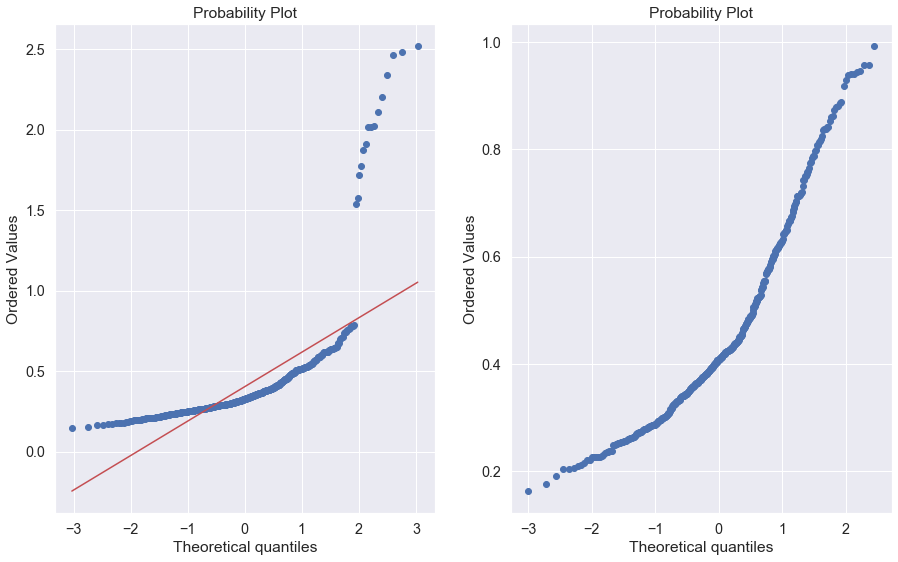

In [77]:
plt.figure(figsize = (15,9))
ax = plt.subplot(1, 2, 1)
sps.probplot(data[data['Genotype'] == 'Control']['DYRK1A_N'], plot = ax)

ax = plt.subplot(1, 2, 2)
sps.probplot(data[data['Genotype'] == 'Ts65Dn']['DYRK1A_N'], plot = ax);

QQ-plot для BDNF_N и различных генотипов:

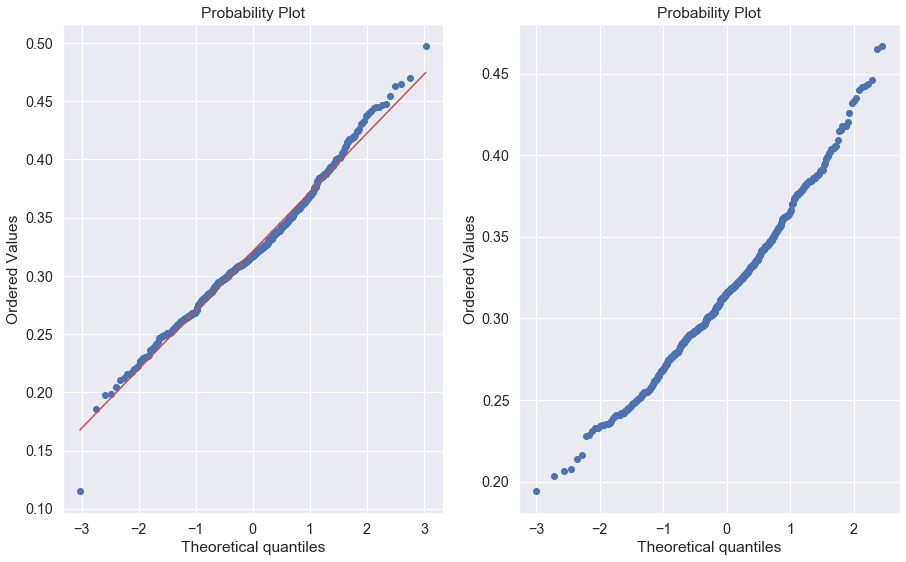

In [70]:
plt.figure(figsize = (15,9))
ax = plt.subplot(1, 2, 1)
sps.probplot(data[data['Genotype'] == 'Control']['BDNF_N'], plot = ax);
ax = plt.subplot(1, 2, 2)
sps.probplot(data[data['Genotype'] == 'Ts65Dn']['BDNF_N'], plot = ax);

Какой критерий можно применять в случае нормальных выборок и одинаковой дисперсии? Можно ли его применять для проверке гипотез о признаках DYRK1A_N, BDNF_N? Примените этот критерий для признака BDNF_N, сделайте выводы.

In [66]:
sps.ttest_ind(data[data['Genotype'] == 'Control']['BDNF_N'].dropna(),
              data[data['Genotype'] == 'Ts65Dn']['BDNF_N'].dropna(), equal_var=True)

Ttest_indResult(statistic=1.440470979622491, pvalue=0.15002536864087548)

**Вывод** Применял критерий Стьюдента, тк именно должен использоваться при одинаковых неизвестных дисперсиях. Его можно применять только если наши данные являются выборкой из нормального распределения, поэтому для DYRK1A_N этого сделать не получится. По результатам исследования получилось, что генотип влияет на распределение для DYRK1A_N, в то время как для BDNF_N такого сказать нельзя (по результатам критерия Уилкинсона-Манна-Уитни).

#### 3. Зависимость уровня экспрессии от генотипа для всех исследуемых белков

Задача заключается в том, чтобы среди всех белков отобрать для дальнейшего более подробного анализа те, по которым уровень экспрессии гена отличается по двум генотипам. Для решения задачи проверьте гипотезы об однородности по генотипам для каждого белка с использованием критерия Уилкоксона-Манна-Уитни.

Почему в данном случае стоит использовать его, а не критерий Стьюдента?

Не забудьте о множественной проверке гипотез. Заметим, что цель исследований &mdash; **отбор** признаков для дальнейшего анализа. Какой метод стоит применять в данном случае? *Обратите внимание на то, как устроены данные.*

Распечатайте результаты МПГ для всех признаков. Сделайте вывод.

**Ответы на вопросы**: Наш случай является непараметрическим, поэтому Критерий Стьюдента здесь не подходит.
Выборки можно считать независимыми, так как данные были получены на основе исследования разных мышей, а не одной конкретной мыши несколько раз, поэтому стоит применять критерий Бенджамини-Хохберга, как наиболее мощный критерий в случае независимости выборок.

In [69]:
pvalues = np.array([sps.mannwhitneyu(data[data['Genotype'] == 'Control'].iloc[:,i],
                                     data[data['Genotype'] == 'Ts65Dn'].iloc[:,i],
                                     use_continuity=True, alternative='two-sided')[1] for i in np.arange(1,78)])
pvalues_corrected =   multipletests(pvalues, alpha = 0.05, method='fdr_bh')[0]
df = pd.DataFrame(data = pvalues_corrected, index = data.columns[1:78])
df.transpose()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,True,True,False,True,True,False,False,False,True,True,...,False,False,True,True,False,True,True,True,True,False


Выше в таблице True соответствует случаю, когда мы не отвергаем гипотезу по результатам работы критерия, False - отвергаем.

Для каждого признака посчитайте оценку сдвига. Сделайте вывод.

In [68]:
shift_estimation = []

for i in np.arange(1,78):
    Control = data[data['Genotype'] == 'Control'].iloc[:,i].dropna().to_numpy()
    Ts65Dn = data[data['Genotype'] == 'Ts65Dn'].iloc[:,i].dropna().to_numpy()
    W = np.array([[Control[k] - Ts65Dn[j] for k in range(len(Control)-1)] for j in range(len(Ts65Dn -1))])
    shift_estimation.append(np.median(W))

df = pd.DataFrame(data = shift_estimation, index = data.columns[1:78],columns = ['Оценка сдвига'])
df['Разные распределения'] = pvalues_corrected
df.transpose()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
Оценка сдвига,-0.0676426,-0.113717,0.00434725,0.0657516,0.269379,-0.00471105,-0.000293031,0.0524534,-0.0119879,-0.0514083,...,0.000682207,-0.00341462,0.00199628,0.00537903,0.00316142,0.0316001,-0.0194246,0.0101796,-0.0136416,-0.0376837
Разные распределения,True,True,False,True,True,False,False,False,True,True,...,False,False,True,True,False,True,True,True,True,False


**Вывод** Видно, что какие-то белки распределены по разному, какие-то нет, причем по результатам оценки сдвига можно сделать вывод о том, что гипотеза отвергается, если есть большая величина сдвига одного распределения относительно другого. 

### Задача 2
Для анализа будем использоваться датасет <a href="https://ru.wikipedia.org/wiki/Экспрессия_генов">экспресии генов</a> в нормальных тканях и в <a href="https://ru.wikipedia.org/wiki/Карцинома">карциномах</a>, полученные c помощью нуклеотидных [микрочипов](https://ru.wikipedia.org/wiki/%D0%94%D0%9D%D0%9A-%D0%BC%D0%B8%D0%BA%D1%80%D0%BE%D1%87%D0%B8%D0%BF). Данные опубликованы в работе `Notterman, et al, Cancer Research vol. 61: 2001`.
Всего доступна информация о 18 опухолевых образцах и о соответсвующих им здоровых тканях.

Для лучшего понимания задачи можно почитать следующие статьи:
* https://fb.ru/article/256575/ekspressiya-genov---eto-chto-takoe-opredelenie-ponyatiya
* https://ru.qwe.wiki/wiki/Gene_expression

Загрузим данные

In [ ]:
! wget -o CarcinomaNormalDatasetCancerResearchText.zip http://genomics-pubs.princeton.edu/oncology/Data/CarcinomaNormalDatasetCancerResearchText.zip
! unzip CarcinomaNormalDatasetCancerResearchText.zip

Загрузим данные в `pandas` и посмотрим на них:

In [18]:
data = pd.read_table(
    "CarcinomaNormalDatasetCancerResearch.txt", 
    skiprows=range(1,8), index_col=0, usecols=range(39)
)
data = data.drop(['Sample'], axis=1)

data.head()

,Description,Tumor 27,Tumor 29,Tumor 34,Tumor 28,Tumor 35,Tumor 8,Tumor 3,Tumor 9,Tumor 4,...,Normal 4,Normal 32,Normal 39,Normal 10,Normal 33,Normal 5,Normal 11,Normal 6,Normal 12,Normal 40
Accession Number,,,,,,,,,,,,,,,,,,,,,
X53416,Human mRNA for actin-binding protein (filamin)...,70.0,108.0,75.0,871.0,-92.0,21.0,225.0,-346.0,-378.0,...,632.0,1412.0,1122.0,644.0,1760.0,488.0,164.0,1282.0,68.0,928.0
M83670,"""Human carbonic anhydrase IV mRNA, complete cds""",-81.0,-30.0,-1.0,4.0,-34.0,-13.0,118.0,-35.0,31.0,...,185.0,288.0,416.0,625.0,320.0,564.0,330.0,116.0,718.0,332.0
X90908,H.sapiens mRNA for I-15P (I-BABP) protein,25.0,-7.0,5.0,14.0,14.0,5.0,-5.0,37.0,-29.0,...,4723.0,-21.0,-7.0,-28.0,-8.0,-29.0,-13.0,-4.0,-50.0,4.0
M97496,"""Homo sapiens guanylin mRNA, complete cds""",10.0,60.0,48.0,78.0,19.0,11.0,175.0,42.0,105.0,...,1107.0,731.0,1559.0,1762.0,917.0,1303.0,721.0,542.0,1816.0,412.0
X90908,H.sapiens mRNA for I-15P (I-BABP) protein,22.0,0.0,6.0,-6.0,11.0,-18.0,-40.0,39.0,-54.0,...,3344.0,8.0,5.0,-7.0,-2.0,-9.0,12.0,0.0,-28.0,0.0


Посмотрим также на хвост данных

In [19]:
data.tail()

,Description,Tumor 27,Tumor 29,Tumor 34,Tumor 28,Tumor 35,Tumor 8,Tumor 3,Tumor 9,Tumor 4,...,Normal 4,Normal 32,Normal 39,Normal 10,Normal 33,Normal 5,Normal 11,Normal 6,Normal 12,Normal 40
Accession Number,,,,,,,,,,,,,,,,,,,,,
X54489,Human gene for melanoma growth stimulatory act...,123.0,271.0,127.0,59.0,265.0,3.0,110.0,30.0,97.0,...,3.0,8.0,16.0,8.0,19.0,11.0,3.0,7.0,21.0,32.0
T55008,yb45h04.s1 Homo sapiens cDNA clone 74167 3' si...,2.0,-1.0,7.0,3.0,-2.0,9.0,7.0,-5.0,0.0,...,-4.0,-5.0,-17.0,15.0,-10.0,7.0,-5.0,3.0,22.0,-5.0
M10065,"""Human apolipoprotein E (epsilon-4 allele) gen...",19.0,-51.0,192.0,367.0,126.0,145.0,-14.0,-53.0,-51.0,...,-103.0,39.0,-10.0,-97.0,-1.0,-145.0,-63.0,-69.0,-214.0,72.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В конце прочитались две пустых строки. Удалим их и убедимся, что пропусков в данных нет

In [20]:
data = data.iloc[:-2]
data.isna().sum()

Description    1
Tumor 27       0
Tumor 29       0
Tumor 34       0
Tumor 28       0
Tumor 35       0
Tumor 8        0
Tumor 3        0
Tumor 9        0
Tumor 4        0
Tumor 32       0
Tumor 39       0
Tumor 10       0
Tumor 33       0
Tumor 5        0
Tumor 11       0
Tumor 6        0
Tumor 12       0
Tumor 40       0
Normal 27      0
Normal 29      0
Normal 34      0
Normal 28      0
Normal 35      0
Normal 8       0
Normal 3       0
Normal 9       0
Normal 4       0
Normal 32      0
Normal 39      0
Normal 10      0
Normal 33      0
Normal 5       0
Normal 11      0
Normal 6       0
Normal 12      0
Normal 40      0
dtype: int64

Каждый ряд соответствует какому-то из интересующих нас генов, а колонка соответствует данным об экспресии каждого гена в опухолевых (`Tumor`) и контрольных (`Normal`) клеток.

Явно укажем вещественный тип данных

In [21]:
data.iloc[:, 2:] = data.iloc[:, 2:].astype('float')

Проверим, уникальны ли все образцы в датасете, для этого сравним количество уникальных ID генов с количеством строк:

In [22]:
len(np.unique(data.index)), len(data.index)

(6604, 7464)

Некоторые эксперименты повторялись более одного раза. Оставим те, где средний уровень экспрессии выше.

In [23]:
data['mean_expr'] = data.iloc[:, 1:-1].mean(axis=1)
data.sort_values(by=['mean_expr'], ascending=False)
data = data.groupby('Accession Number').first()

Сохраним описания генов и данные по их экспрессии отдельно. Значение средней экспрессии нам не нужны, поэтому избавимся от них

In [24]:
expr_data, descr = data.drop(
    ['Description', 'mean_expr'], axis=1
), data.Description

In [25]:
expr_data.head()

,Tumor 27,Tumor 29,Tumor 34,Tumor 28,Tumor 35,Tumor 8,Tumor 3,Tumor 9,Tumor 4,Tumor 32,...,Normal 4,Normal 32,Normal 39,Normal 10,Normal 33,Normal 5,Normal 11,Normal 6,Normal 12,Normal 40
Accession Number,,,,,,,,,,,,,,,,,,,,,
BioB,-2.0,-11.0,-17.0,-1.0,-14.0,-8.0,-13.0,31.0,-24.0,-17.0,...,-23.0,-10.0,-13.0,-25.0,-12.0,-10.0,3.0,-3.0,-24.0,-14.0
BioC,12.0,9.0,17.0,18.0,10.0,53.0,-2.0,57.0,-15.0,54.0,...,-16.0,13.0,14.0,-10.0,14.0,-18.0,75.0,-20.0,22.0,3.0
BioD,107.0,65.0,108.0,95.0,94.0,473.0,93.0,161.0,60.0,232.0,...,58.0,104.0,117.0,142.0,123.0,207.0,461.0,137.0,289.0,82.0
D00003,2.0,7.0,1.0,-3.0,0.0,10.0,15.0,-2.0,36.0,-1.0,...,626.0,0.0,0.0,74.0,4.0,13.0,24.0,4.0,4.0,-1.0
D00015,26.0,13.0,13.0,9.0,2.0,10.0,20.0,17.0,21.0,17.0,...,24.0,79.0,22.0,52.0,59.0,40.0,42.0,71.0,43.0,60.0


Для удобства работы транспонируем матрицу данных об экспрессии, и разметим для каждой строки, является ли образец опухолевым или нормой

In [26]:
expr_data = expr_data.T

Осуществим разметку данных

In [27]:
expr_data['Label'] = expr_data.index.map(
    lambda x: -1 if x.split(' ')[0] == 'Tumor' else 1
)

expr_data.head()

Accession Number,BioB,BioC,BioD,D00003,D00015,D00102,D00137,D00173,D00265,D00306,...,Z50753,Z50788,b-actin-3,b-actin-5,b-actin-M,cre,gapdh-3,gapdh-5,gapdh-M,Label
Tumor 27,-2.0,12.0,107.0,2.0,26.0,5.0,18.0,1.0,153.0,-7.0,...,35.0,-1.0,797.0,559.0,849.0,246.0,1214.0,676.0,873.0,-1
Tumor 29,-11.0,9.0,65.0,7.0,13.0,2.0,13.0,5.0,145.0,-7.0,...,26.0,3.0,1298.0,409.0,1093.0,414.0,1394.0,477.0,609.0,-1
Tumor 34,-17.0,17.0,108.0,1.0,13.0,0.0,11.0,10.0,132.0,-6.0,...,25.0,1.0,862.0,667.0,961.0,449.0,1252.0,635.0,754.0,-1
Tumor 28,-1.0,18.0,95.0,-3.0,9.0,10.0,28.0,8.0,73.0,-17.0,...,41.0,-2.0,1047.0,643.0,1100.0,369.0,1313.0,785.0,1013.0,-1
Tumor 35,-14.0,10.0,94.0,0.0,2.0,-5.0,6.0,10.0,184.0,10.0,...,29.0,2.0,1253.0,437.0,844.0,345.0,1292.0,497.0,669.0,-1


Посмотрим на значения экспрессии случайного гена и сравним плотности этих распределений.

Выберите ген `D00137`  и постройте на одном графике ядерные оценки плотности экспрессии в нормальных и раковых тканях (две оценки).

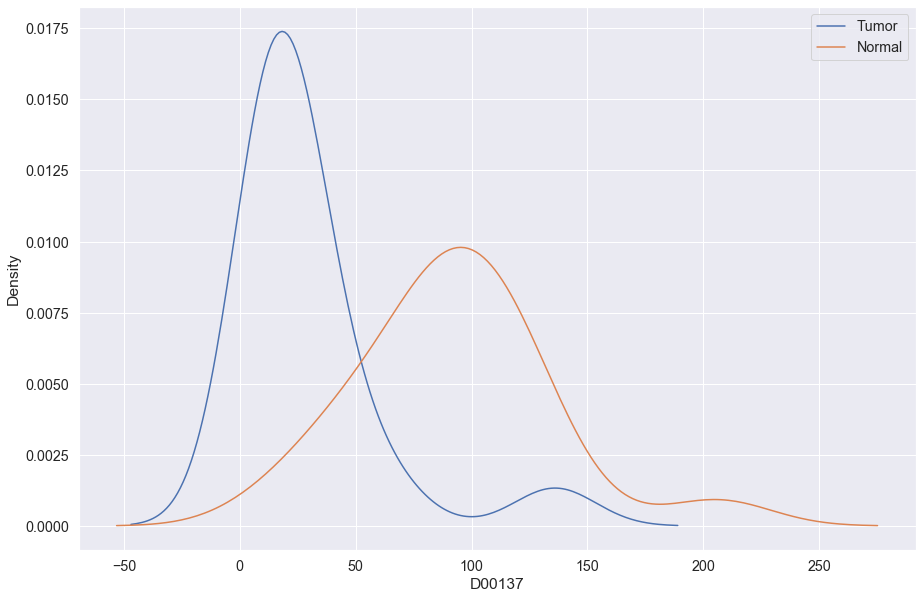

In [28]:
j = np.where(expr_data.index == 'Tumor 40')[0][0]
k = np.where(expr_data.columns == 'D00137')[0][0]
plt.figure(figsize = (15,10))
sns.kdeplot(expr_data.iloc[0:j,k], label = 'Tumor')
sns.kdeplot(expr_data.iloc[j:,k], label = 'Normal')
plt.legend();

В анализе данных также часто применяется простой визуальный метод сравнения распределений: boxplot или ящик с усами.  На  графике ящика с усами в наглядном виде указана медиана выборки, выборочные квантили уровня 25% и 75%, а также потенциальные выбросы:


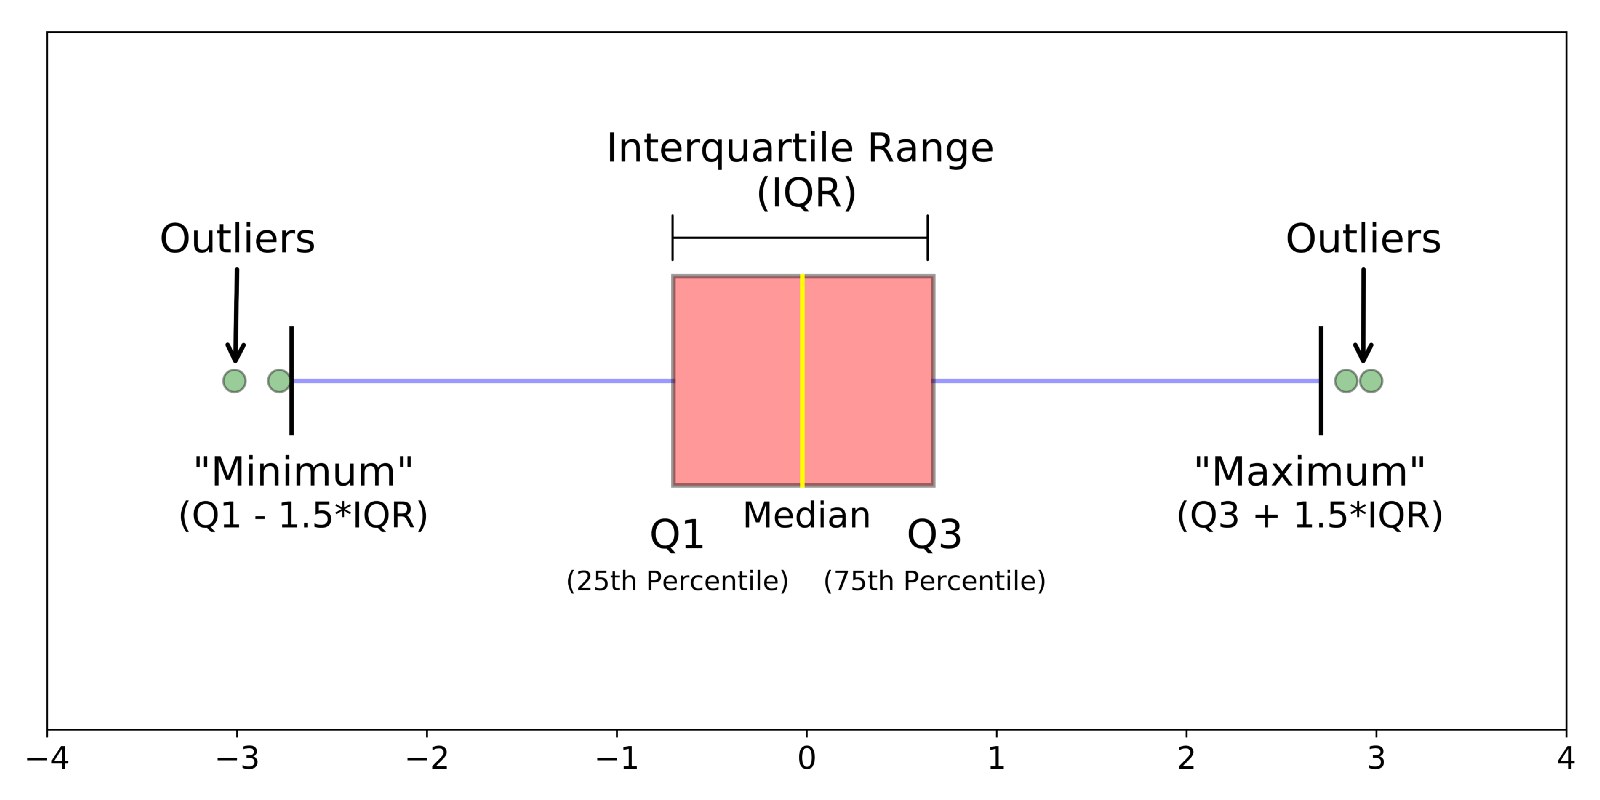

Постройте ящик с усами для гена `D00137`   , так чтобы по оси x был параметр `Label`, а по оси y &mdash; значения экспрессии, т.е. свой ящик для нормальной и раковой тканей. Используйте функцию `sns.boxplot`.

На Графиках ниже -1 соответствует Tumor, 1 - Normal.

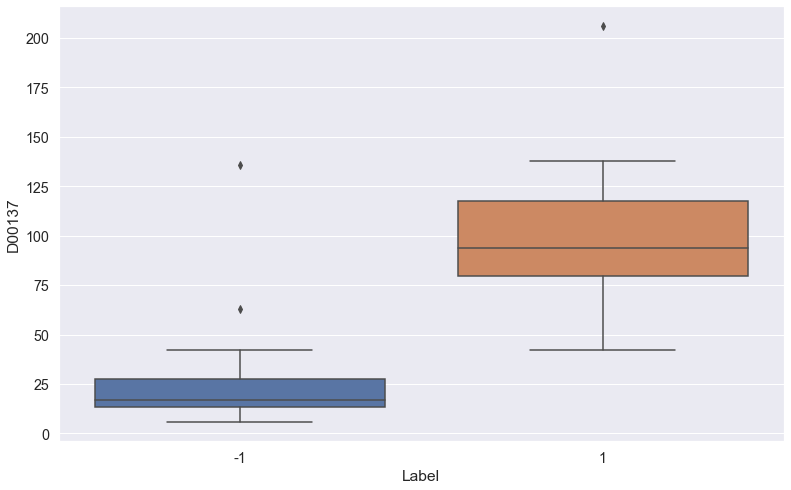

In [41]:
df_D00137 = pd.concat([expr_data[expr_data.Label== 1].loc[:, ['D00137', 'Label']], 
                     expr_data[expr_data.Label== -1].loc[:, ['D00137', 'Label']]])

plt.figure(figsize = (13,8))
sns.boxplot(x = df_D00137.Label, y = df_D00137.D00137);

In [31]:
print(df_D00137)

Accession Number  D00137  Label
Normal 27           71.0      1
Normal 29          117.0      1
Normal 34          118.0      1
Normal 28          119.0      1
Normal 35          105.0      1
Normal 8            42.0      1
Normal 3           101.0      1
Normal 9            81.0      1
Normal 4            47.0      1
Normal 32          138.0      1
Normal 39          118.0      1
Normal 10           92.0      1
Normal 33           96.0      1
Normal 5            50.0      1
Normal 11           85.0      1
Normal 6            79.0      1
Normal 12           81.0      1
Normal 40          206.0      1
Tumor 27            18.0     -1
Tumor 29            13.0     -1
Tumor 34            11.0     -1
Tumor 28            28.0     -1
Tumor 35             6.0     -1
Tumor 8             63.0     -1
Tumor 3             26.0     -1
Tumor 9            136.0     -1
Tumor 4             26.0     -1
Tumor 32            42.0     -1
Tumor 39             8.0     -1
Tumor 10            20.0     -1
Tumor 33

Постройте аналогичные графики, используя `seaborn.violinplot` , популярную модификацию boxplot-а.

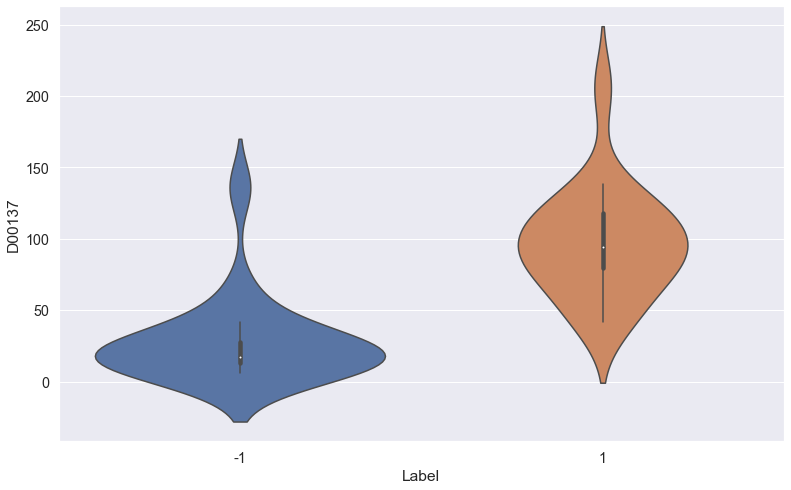

In [40]:
plt.figure(figsize = (13,8))
sns.violinplot(x = df_D00137.Label, y = df_D00137.D00137);

Как устроен violinplot ? Какой способ визуализации кажется вам более информативным? Почему?

График скрипка также содержит информацию о распределении в отличие от ящика с усами, что является достойным приемуществом.
Однако ящик с усами содержит информацию о выбросах, их гораздо легче детектировать. Поэтому оба метода хороши в плане анализа, стоит их комбинировать для более детального изучения данных. Стоит добавить, что ящик с усами гораздо проще воспринимается обычным обывателем, тк там легче увидеть информацию о медиане, первом, третьем квантиле и тех самых усах, которые отсекают выбросы.

На графиках видно, что для одного случайного гена профили экспрессии возможно различаются.  
Но насколько это статистически достоверно и такова ли эта картина в целом?   
  
  
Для продолжения анализа необходимо понять, как именно были получены данные. Для этого обратимся к статье:  
_Gene intensity information was converted to a mean intensity for each gene by proprietary software (Affymetrix), which includes routines for filtering and centering the data (in these experiments, to 50 intensity units). Expression of genes related to smooth muscle and connective tissue was consistently greater in the normal than the tumor samples, probably because of the greater heterogeneity of tissue type in the normal samples_

Видим, что нормализация данных уже выполнена.
Во многих случаях для визуализации удобно переходить к логарифмическому формату данных.

Предварительный зрительный анализ может сказать очень многое о том, как устроены наши данные. Тем не менее, для получения полной картины простого взгляда на данные недостаточно. Первое на что нужно обрать внимание &mdash; это параметры распределения. Все распределения в первую очередь характеризуются медианой и средним. Для гена `D00137` вычислите медиану и средний уровень экспрессии в опухолевых и нормальных тканей.

In [46]:
print('Медиана (общий):',np.median(df_D00137['D00137']))
print('Медиана (Normal):',np.median(df_D00137['D00137'][df_D00137['Label'] == 1]))
print('Медиана (Tumor):',np.median(df_D00137['D00137'][df_D00137['Label'] == -1]))
print('Средний уровень экспрессии (общий):',np.mean(df_D00137['D00137']))
print('Средний уровень экспрессии (Normal):',np.mean(df_D00137['D00137'][df_D00137['Label'] == 1]))
print('Средний уровень экспрессии (Tumor):',np.mean(df_D00137['D00137'][df_D00137['Label'] == -1]))

Медиана (общий): 48.5
Медиана (Normal): 94.0
Медиана (Tumor): 17.0
Средний уровень экспрессии (общий): 62.583333333333336
Средний уровень экспрессии (Normal): 97.0
Средний уровень экспрессии (Tumor): 28.166666666666668


Для того, чтобы утверждать, что "ген `X` овер-экспрессирован в опухолевых образцах", недостаточно просто посмотреть на боксплоты, необходимо провести статистический анализ.

Для анализ одного гена проверяются гипотезы о сравнении профилей экспрессий между опухолевыми и контрольными образцами:  
   $\mathsf{H}_0\colon$ для гена `X` не наблюдается разницы средних экспрессий;  
   $\mathsf{H}_1\colon$ для гена `X` наблюдается разница средних экспрессий.
    
Какой критерий стоит выбрать для проверки в предположении нормальности распределений? Воспользуйтесь этим критерием для проверки гипотезы для гена `Human class I alcohol dehydrogenase beta-1 subunit, allele 1 mRNA, complete cds` (см. столбец `Description`).

Стоит применять критерий Стьюдента, тк выборки являются независимыми.

In [48]:
data[data['Description']=='"Human class I alcohol dehydrogenase beta-1 subunit, allele 1 mRNA, complete cds"']

,Description,Tumor 27,Tumor 29,Tumor 34,Tumor 28,Tumor 35,Tumor 8,Tumor 3,Tumor 9,Tumor 4,...,Normal 32,Normal 39,Normal 10,Normal 33,Normal 5,Normal 11,Normal 6,Normal 12,Normal 40,mean_expr
Accession Number,,,,,,,,,,,,,,,,,,,,,
D00137,"""Human class I alcohol dehydrogenase beta-1 su...",18.0,13.0,11.0,28.0,6.0,63.0,26.0,136.0,26.0,...,138.0,118.0,92.0,96.0,50.0,85.0,79.0,81.0,206.0,58.485714


Проинтерпретируйте результаты:

In [78]:
D00137 = pd.concat([expr_data[expr_data.Label == 1].loc[:, ['D00137', 'Label']], 
                     expr_data[expr_data.Label == -1].loc[:, ['D00137', 'Label']]]
                   
sps.ttest_ind(D00137[D00137.Label == 1]['D00137'], d00137[d00137.Label == -1]['D00137'],equal_var= False)

SyntaxError: invalid syntax (<ipython-input-78-655f18e85304>, line 4)

Давайте проверим, что наши данные действительно разделяются на два разных распределения. Для этого проверим, как будет работать этот же метод, если случайным образом перемешать метки подгрупп. Реализуйте случайное сэмплирование с помощью функции `random.choice` из библиотеки `numpy` и посмотрите, как изменится p-value (и изменится ли).

In [ ]:
<...>

Сделайте вывод

<...>

И, наконец, самое интересное. Посчитайте, в каком проценте генов, для которых с уровнем значимости 0.05 наблюдается овер-экспрессия в опухолевых тканях. При этом важно выполнить поправку на множественное тестирование.

Сначала выполним несколько учебных заданий. 

а*) Реализуйте критерий, который вы использовали в предыдущем пункте, самостоятельно. 

In [ ]:
<...>

б) Реализуйте поправку Бонферрони (метод Бонферрони) самостоятельно. Функция должна возвращать результаты отвержения гипотез и скорректированные p-value.

In [ ]:
<...>

в) Проведите МПГ с использованием вашей реализации и с использованием реализации критерия из scipy и МПГ из statsmodels. В случае, если вы не выполняли пункт а), используйте только вашу реализацию пункта б). Сравните результаты.

In [ ]:
<...>

Какие методы контроля FWER можно использовать в данной задаче? Сделайте проверку с использованием наилучшего (наиболее мощного) возможного метода. Используйте стандартные реализации.

In [ ]:
<...>

Далее используйте результаты последней проверки (с использованием наилучшего метода). Постройте гистограмму полученных значений p-value и скорректированных.

In [ ]:
<...>

Напечатайте число генов, для которых можно отвергнуть нулевую гипотезу, а также их долю среди всех генов.

In [ ]:
<...>

Посмотрим, какие же гены оверэкспрессированы. В коде ниже `p_vals_adjusted` &mdash; скорректированные значения p-value.

In [ ]:
for name, function in zip(
    expr_data.columns[np.where([p_vals_adjusted < 0.05])[1]], 
    descr[np.where([p_vals_adjusted < 0.05])[1]]
):
    print(name + ": " + function)